In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

red = "#D81B60"
yellow = "#FFC107"
blue = "#1E88E5"
green = "#004D40"

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [27]:
df_0 = pd.read_csv('../results/estimate/magritte_0_results.csv')
df_1 = pd.read_csv('../results/estimate/magritte_1_results.csv')
df_2 = pd.read_csv('../results/estimate/magritte_2_results.csv')

magritte_df = pd.merge(df_0, df_1, on=('filename','target'), how='outer', suffixes=('_0', '_1'))
magritte_df = pd.merge(magritte_df, df_2, on=('filename','target'), how='outer', suffixes=('', '_2'))
magritte_df.rename(columns={'estimate':'estimate_2'}, inplace=True)

magritte_df["estimate"] = magritte_df[["estimate_0", "estimate_1", "estimate_2"]].mean(axis=1)
magritte_df = magritte_df[magritte_df["target"] > 0]


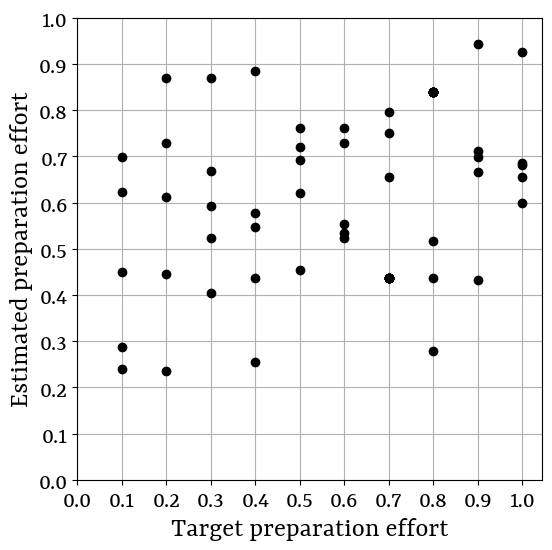

In [38]:
plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(zorder=-10)
ax.set_axisbelow(True)
bins = [np.arange(-.05,1.15,.1), np.arange(-.05,1.15,.1)]
x, y = magritte_df['target'], magritte_df["estimate"]
ax.scatter(x, y, label='Magritte', color="black")


ax.set_xlabel("Target preparation effort", size=labelsize)
ax.set_ylabel("Estimated preparation effort", size=labelsize)

ticks = list(np.arange(0,1.1,0.1))
ticklabels = [f"{tick:.1f}" for tick in ticks]
ax.set_xticks(ticks=ticks, labels=ticklabels, size=labelsize-2);
ax.set_yticks(ticks=ticks, labels=ticklabels, size=labelsize-2);

plt.savefig('estimate_results.png', dpi=300, bbox_inches='tight')